In [78]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [79]:
site = "https://books.toscrape.com/"
info = requests.get(site)

soup = BeautifulSoup(info.text, 'html.parser')

for article in soup.find_all('article'):
    print(article.h3.a.text)
    print(article.find('p', class_='price_color').text[2:])
    print(article.p['class'][1])

A Light in the ...
51.77
Three
Tipping the Velvet
53.74
One
Soumission
50.10
One
Sharp Objects
47.82
Four
Sapiens: A Brief History ...
54.23
Five
The Requiem Red
22.65
One
The Dirty Little Secrets ...
33.34
Four
The Coming Woman: A ...
17.93
Three
The Boys in the ...
22.60
Four
The Black Maria
52.15
One
Starving Hearts (Triangular Trade ...
13.99
Two
Shakespeare's Sonnets
20.66
Four
Set Me Free
17.46
Five
Scott Pilgrim's Precious Little ...
52.29
Five
Rip it Up and ...
35.02
Five
Our Band Could Be ...
57.25
Three
Olio
23.88
One
Mesaerion: The Best Science ...
37.59
One
Libertarianism for Beginners
51.33
Two
It's Only the Himalayas
45.17
Two


In [88]:
i = 1
nb_page = 10
dict_response = {}
list_titre = []
list_prix = []
list_note = []

while i < nb_page:
    url = f"https://books.toscrape.com/catalogue/page-{i}.html"
    response = requests.get(url)

    soup = BeautifulSoup(response.text, 'html.parser')
    
    for article in soup.find_all('article'):
        title = article.h3.a.text
        price = article.find('p', class_='price_color').text
        note = article.p['class'][1]
        list_titre.append(title)
        list_prix.append(price[2:])
        list_note.append(note)  

    i += 1

dict_response['Titre'] = list_titre
dict_response['Prix'] = list_prix
dict_response['Note'] = list_note

print(dict_response)

{'Titre': ['A Light in the ...', 'Tipping the Velvet', 'Soumission', 'Sharp Objects', 'Sapiens: A Brief History ...', 'The Requiem Red', 'The Dirty Little Secrets ...', 'The Coming Woman: A ...', 'The Boys in the ...', 'The Black Maria', 'Starving Hearts (Triangular Trade ...', "Shakespeare's Sonnets", 'Set Me Free', "Scott Pilgrim's Precious Little ...", 'Rip it Up and ...', 'Our Band Could Be ...', 'Olio', 'Mesaerion: The Best Science ...', 'Libertarianism for Beginners', "It's Only the Himalayas", 'In Her Wake', 'How Music Works', 'Foolproof Preserving: A Guide ...', 'Chase Me (Paris Nights ...', 'Black Dust', 'Birdsong: A Story in ...', "America's Cradle of Quarterbacks: ...", 'Aladdin and His Wonderful ...', 'Worlds Elsewhere: Journeys Around ...', 'Wall and Piece', 'The Four Agreements: A ...', 'The Five Love Languages: ...', 'The Elephant Tree', 'The Bear and the ...', "Sophie's World", 'Penny Maybe', 'Maude (1883-1993):She Grew Up ...', 'In a Dark, Dark ...', 'Behind Closed Doo

In [89]:
df = pd.DataFrame(dict_response)

In [90]:
df.head(200)

,Titre,Prix,Note
0,A Light in the ...,51.77,Three
1,Tipping the Velvet,53.74,One
2,Soumission,50.10,One
3,Sharp Objects,47.82,Four
4,Sapiens: A Brief History ...,54.23,Five
...,...,...,...
175,Poses for Artists Volume ...,41.06,One
176,Poems That Make Grown ...,14.19,Four
177,"Nightingale, Sing",38.28,One
178,Night Sky with Exit ...,41.05,One


In [91]:
print(df.describe())

                     Titre   Prix Note
count                  180    180  180
unique                 180    177    5
top     A Light in the ...  33.34  One
freq                     1      2   45


<Axes: ylabel='Frequency'>

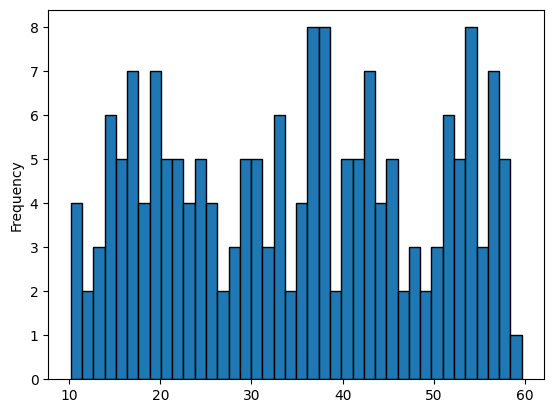

In [92]:
df['Prix'] = df['Prix'].astype(float)
df['Prix'].plot(kind='hist', bins=40, edgecolor='black')

<Axes: xlabel='Note'>

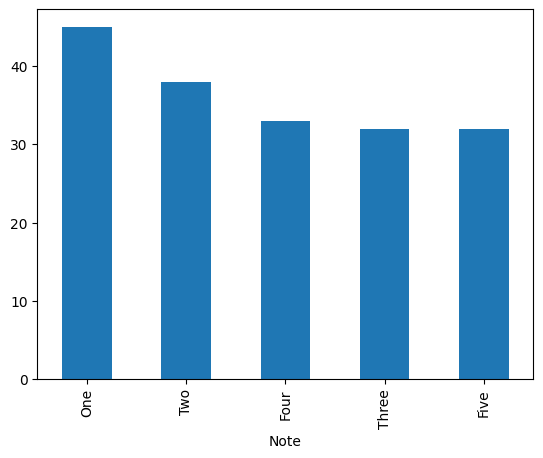

In [93]:
df['Note'].value_counts().plot(kind='bar')